## <div align="center">Business Data Science Home Work: 6</div>

## <div align="center">Submitted by Prajval Gupta & Subhayu Chakravarty</div>

In [1]:
# Import Statements
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

from scipy.stats import skew
from scipy.stats.stats import pearsonr
from sklearn.linear_model import Ridge, RidgeCV, LassoCV, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score, accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

## Problem 1: Multi-class Classification – MNIST

In this exercise you will explore the MNIST data set which you will find here: <a href="https://www.
openml.org/d/554">https://www.
openml.org/d/554</a>. MNIST is a data set of handwritten digits, and is considered one of the
“easiest” image recognition problems in computer vision.

- Use the fetch openml command from sklearn.datasets to import the MNIST data set,
- Use Random Forests to try to get the best possible test accuracy on MNIST. This involves getting acquainted with how Random Forests work, understanding their parameters, and therefore using Cross Validation to find the best settings. How well can you do? You should use the accuracy metric, since this is what you used in Lab 5 – therefore this will allow you to compare your results from Random Forests with your results from L1- and L2- Regularized Logistic Regression. What are the hyperparameters of your best model?

- Use Boosting to do the same. Take the time to understand how XGBoost works (and/or other boosting packages available). Try your best to tune your hyper-parameters. As added motivation: typically the winners and near-winners of the Kaggle competition are those that are best able to tune an cross validate XGBoost. What are the hyperparameters of your best model?

- (Optional) Run multi-class logistic regression on these using the cross entropy loss. You may have to play around with the hyperparameters (especially the tolerance) to get it to converge in a reasonable amount of time. I recommend the SAGA solver. Try to optimize the hyperparameters. Report your training and test loss from above,

- (Optional) Choose an 1 regularizer (penalty), and see if you can get a sparse solution with almost as good accuracy.
- (Optional) Note that in Logistic Regression, the coefficients returned (i.e., the β’s) are the same dimension as the data. Therefore we can pretend that the coefficients of the solution 1 are an image of the same dimension, and plot it. Do this for the 10 sets of coefficients that correspond to the 10 classes. You should observe that, at least for the sparse solutions, these “kind of” look like the digits they are classifying.

#### Data Loading using `fetch_openml` command

In [11]:
X,y = fetch_openml('mnist_784',version=1, return_X_y=True)

#### Image display

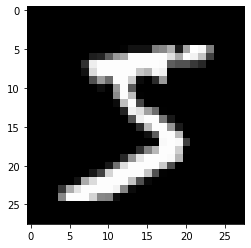

In [23]:
plt.imshow(X[0].reshape((28, 28)), cmap='gray')
plt.show()

#### Splitting the data into training and testing set

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### Random Forest Classifier

In [62]:
param_grid = {
    'bootstrap': [True,False],
    'max_features': ['auto','sqrt'],
    'min_samples_split': [2,3],
    'n_estimators': [80,100,120]
}

rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)

grid_search.fit(X_train,y_train)
grid_search.best_params_

Fitting 2 folds for each of 24 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  9.1min finished


{'bootstrap': False,
 'max_features': 'auto',
 'min_samples_split': 3,
 'n_estimators': 120}

### Best Hyperparameters

So, The best parameters after using GridSearchCV are:
1. 'bootstrap': False,
2. 'max_features': 'auto'
3. 'min_samples_split': 3
4. 'n_estimators': 120

### Cross-Validation using the best hyperparameters found using GridSearchCV

In [78]:
rfc = RandomForestClassifier(bootstrap = False, max_features = "auto", min_samples_split=3, n_estimators=120)
score = cross_val_score(rfc, X_train, y_train)
print ("The mean Cross-Validation accuracy is %0.2f" % np.mean(score))

The mean Cross-Validation accuracy is 0.97


In [80]:
rfc.fit(X_train, y_train)
test_accuracy = rfc.score(X_test, y_test)

### Testing Accuracy 

In [83]:
test_accuracy

0.9709142857142857

### XGBoost Classifier

In [117]:
param_grid_xgb = {"learning_rate": [0.1, 0.01],
               "gamma" : [0.1, 0.5, 1],
               "max_depth": [2, 4],
               "n_estimators": [100, 250, 500]}
xgb = XGBClassifier()

grid_search_xgb = GridSearchCV(estimator = xgb, param_grid = param_grid_xgb, 
                          cv = 2, n_jobs = -1, verbose=2)

grid_search_xgb.fit(X_train,y_train)
grid_search_xgb.best_params_

### Best Hyperparameters

So, The best parameters after using GridSearchCV are:
1. 'learning_rate': 0.1
2. 'gamma': '1'
3. 'max_depth': 2
4. 'n_estimators': 500

### Cross-Validation using the best hyperparameters found using GridSearchCV

In [118]:
xgb = XGBClassifier(learning_rate=0.1, gamma=1, max_depth=2. n_estimators=500)
score = cross_val_score(xgb, X_train, y_train)
print ("The mean Cross-Validation accuracy is %0.2f" % np.mean(score))

/Users/prajvalgupta/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


The mean Cross-Validation accuracy is 0.93


In [119]:
xgb.fit(X_train, y_train)
test_accuracy = xgb.score(X_test, y_test)

### Testing Accuracy 

In [121]:
test_accuracy

0.9290857142857143

## Problem 2: CIFAR-10

In this problem you will explore the data set CIFAR-10, just as you did above for MNIST. Now that you have your pipeline set up, it should be easy to apply the above procedure to CIFAR-10. If you did something that takes significant computation time, keep in mind that CIFAR-10 is a few times larger.

- (Optional) You can read about the CIFAR-10 and CIFAR-100 data sets here: 
<a href="https://www.cs.toronto.edu/~kriz/cifar.html">https://www.cs.toronto.edu/~kriz/cifar.html"</a>.
- (Optional) OpenML curates a number of data sets. You will use a subset of CIFAR-10 provided by them. Read here for a description: 
<a href="https://www.openml.org/d/40926">https://www.openml.org/d/40926</a>
- Use the fetch openml command from sklearn.datasets to import the CIFAR-10-Small data set.
- Figure out how to display some of the images in this data set, and display a couple. While not high resolution, these should be recognizable if you are doing it correctly.
- What is the best accuracy you can get on the test data, by tuning Random Forests? What are the hyperparameters of your best model?
- What is the best accuracy you can get on the test data, by tuning XGBoost? What are the hyperparameters of your best model?
- (Optional) You will run multi-class logistic regression on these using the cross entropy loss. You have to specify this specifically (multi class=’multinomial’). Use cross validation to see how good your accuracy can be. In this case, cross validate to find as good regularization coefficients as you can, for 1 and 2 regularization (called penalties), which are naturally supported in sklearn.linear model.LogisticRegression. As with MNIST, I recommend you use the solver saga.
- (Optional) Report your training and test loss from above,
- (Optional) How sparse can you make your solutions without deteriorating your testing error too much? Here, I am asking you to try to obtain a sparse solution that has test accuracy that is close to the best solution you found.

#### Data Loading using `fetch_openml` command

In [2]:
X_c,y_c = fetch_openml('CIFAR_10_small',version=1, return_X_y=True)

In [3]:
X_c = X_c/255

#### Display Images

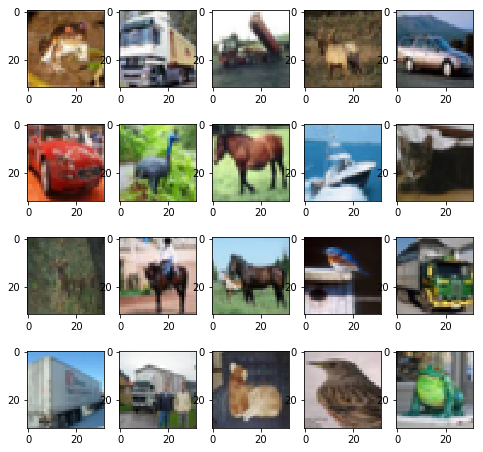

In [4]:
plt.figure(figsize=(8,8))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(np.moveaxis(X_c[i].reshape((3,32, 32)),0,2))
plt.show()

#### Splitting the data into training and testing set

In [5]:
X_c_train, X_c_test, y_c_train, y_c_test = train_test_split(X_c, y_c, test_size=0.25, random_state=0)

### Random Forest Classifier

In [173]:
param_grid = {
'criterion': ['gini', 'entropy'],
'max_depth': [500],
'n_estimators': [50,80,100,120]
}

rf_c = RandomForestClassifier()

In [175]:
grid_search_rf_c = GridSearchCV(estimator = rf_c, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose=2)

grid_search_rf_c.fit(X_c_train,y_c_train)
grid_search_rf_c.best_params_

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  24 | elapsed:  4.2min remaining:   23.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  4.5min finished


{'criterion': 'gini', 'max_depth': 500, 'n_estimators': 120}

So, The best parameters after using GridSearchCV are:
1. 'criterion': gini
2. 'max_depth': 500
3. 'n_estimators': 120

### Cross-Validation using the best hyperparameters found using GridSearchCV

In [181]:
rf_c = RandomForestClassifier(max_depth = 500, max_features = "auto", min_samples_leaf=10, criterion='gini',n_estimators=120)
score_c = cross_val_score(rf_c, X_c_train, y_c_train)
print ("The mean Cross-Validation accuracy is %0.2f" % np.mean(score_c))

/Users/prajvalgupta/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


The mean Cross-Validation accuracy is 0.41


In [177]:
rf_c.fit(X_c_train, y_c_train)
test_accuracy_c = rf_c.score(X_c_test, y_c_test)

### Testing Accuracy

In [178]:
test_accuracy_c

0.4274


### XGBoost Classifier

In [189]:
param_grid_xgb_c = {"learning_rate": [0.1, 0.5],
               "gamma" : [0.1, 0.5, 1],
               "max_depth": [2, 4],
               "n_estimators": [80,100,120]}

In [190]:
xgb_c = XGBClassifier()

In [192]:
grid_search_xgb_c = GridSearchCV(estimator = xgb_c, param_grid = param_grid_xgb_c, 
                          cv = 2, n_jobs = -1, verbose=2)

grid_search_xgb_c.fit(X_c_train,y_c_train)
grid_search_xgb_c.best_params_

In [6]:
xgb_c = XGBClassifier(learning_rate=0.1, gamma=1, max_depth=2, n_estimators=100)
score = cross_val_score(xgb_c, X_c_train, y_c_train)
print ("The mean Cross-Validation accuracy is %0.2f" % np.mean(score))

/Users/subhayuchakravarty/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


The mean Cross-Validation accuracy is 0.40


In [7]:
xgb_c.fit(X_c_train, y_c_train)
test_accuracy_xgb_c = xgb_c.score(X_c_test, y_c_test)

In [8]:
test_accuracy_xgb_c

0.413

So, The best parameters after using GridSearchCV are:
1. 'learning_rate': 0.1
2. 'gamma': '1'
3. 'max_depth': 2
4. 'n_estimators': 100